# Week 2: Geostrophy and thermal wind balance
*MAQ - 32806, Chiel van Heerwaarden & Imme Benedict, 2017*

In this assignment you will investigate whether the large-scale flow is in geostrophic and thermal wind balance. For this, you will use ECMWF ERA-Interim data from the 1st of January 2016 0:00.
___

# Setting up Python and loading the data
We start the tutorial by loading the required Python packages and setting the figure properties.

In [1]:
# Loading the packages.
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
import datetime                 # Datetime is a package to deal with dates.
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LinearSegmentedColormap

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline
plt.rcParams.update({'font.size': 11})          # Set the standard font size of the plots to 11pt.
plt.rcParams.update({'figure.figsize': [13,5]}) # Set the standard figure size.

In [2]:
# Create custom color map similar to the NCAR NCL WhiteBlueGreenYellowRed
cdict = {'red':   ((   0/253., 255./255., 255./255.),
                   (  36/253., 157./255., 157./255.),
                   (  72/253.,  72./255.,  72./255.),
                   ( 108/253.,  73./255.,  73./255.),
                   ( 145/253., 250./255., 250./255.),
                   ( 181/253., 245./255., 245./255.),
                   ( 217/253., 211./255., 211./255.),
                   ( 253/253., 146./255., 146./255.)),
         'green': ((   0/253., 255./255., 255./255.),
                   (  36/253., 218./255., 218./255.),
                   (  72/253., 142./255., 142./255.),
                   ( 108/253., 181./255., 181./255.),
                   ( 145/253., 232./255., 232./255.),
                   ( 181/253., 106./255., 106./255.),
                   ( 217/253.,  31./255.,  31./255.),
                   ( 253/253.,  21./255.,  21./255.)),
         'blue':  ((   0/253., 255./255., 255./255.),
                   (  36/253., 247./255., 247./255.),
                   (  72/253., 202./255., 202./255.),
                   ( 108/253.,  70./255.,  70./255.),
                   ( 145/253.,  92./255.,  92./255.),
                   ( 181/253.,  45./255.,  45./255.),
                   ( 217/253.,  40./255.,  40./255.),
                   ( 253/253.,  25./255.,  25./255.))}

my_cmap = LinearSegmentedColormap('my_colormap', cdict,256)

___
Now, you load the data and read out the desired variables from a NetCDF file from the ECMWF ERA-Interim data archive. You are loading a file with data from 1 January 2016.

In [3]:
# Loading the ERA data.
nc_file = nc.Dataset("era_data.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]
p = nc_file.variables["level"][:]*100.
t = 0
time = nc.num2date(nc_file.variables["time"][t], nc_file.variables["time"].units)
print("The time is: {}".format(time))

# We define the step for the quivering.
nqstep = 4

# With the code below, we roll the map, to get the 0 meridian,
# rather than the Pacific in the middle.
nroll = lon.size//2
lon = np.roll(lon, nroll)
lon = np.where(lon>=180., lon-360., lon)

# We load 3D fields of the two horizontal wind components, the geopotential and the temperature.
u     = np.roll(nc_file.variables["u"][t,:,:,:], nroll, -1)
v     = np.roll(nc_file.variables["v"][t,:,:,:], nroll, -1)
Phi   = np.roll(nc_file.variables["z"][t,:,:,:], nroll, -1)
T     = np.roll(nc_file.variables["t"][t,:,:,:], nroll, -1)

nc_file.close() # The file access is closed as no further data is needed now.

The time is: 2016-01-01 03:00:00


In [4]:
lon_start = -70.
lon_end   =  70.
lat_start =  10.
lat_end   =  75.

___
# Plotting the temperature and geopotential on both maps
As a starting point you find below the temperature and geopotential at 500 hPa.

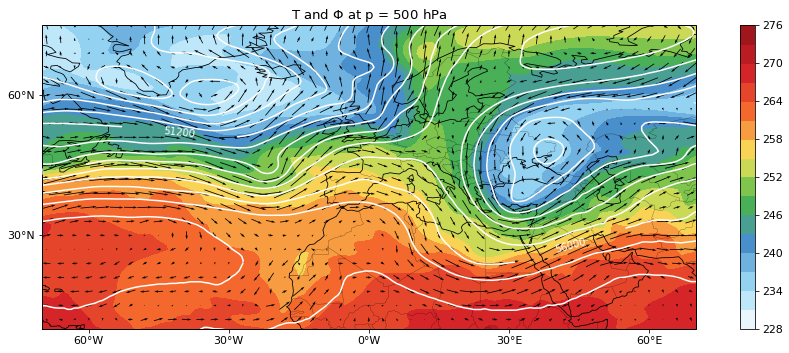

In [5]:
p_plot = 50000.
n = abs(p-p_plot).argmin()
nq = nqstep # In the quiver plot we take steps of nq, otherwise there are too many arrows.

my_projection = ccrs.PlateCarree(central_longitude=0)

fig1 = plt.figure()
ax1 = plt.subplot(111, projection=my_projection)

ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

cb = ax1.contourf(lon, lat, T[n,:,:], 15, cmap=my_cmap) # We plot a colormesh using the gist_ncar colormap.
fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
lons, lats = np.meshgrid(lon, lat)
qu = ax1.quiver(lons[::nq, ::nq], lats[::nq, ::nq], u[n,::nq,::nq], v[n,::nq,::nq],\
                pivot='mid', width=1.2e-3, scale=1000.)
cz = ax1.contour(lon, lat, Phi[n,:,:], 15, colors='w', linewidths=1.5) # We plot the geopotential in contours.
ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
ax1.set_title(r'T and $\Phi$ at p = {0:.0f} hPa'.format(p[n]/100.)); # We add a title to the plot.
ax1.set_xlim(lon_start, lon_end)
ax1.set_ylim(lat_start, lat_end)
fig1.tight_layout() # With this function we make the figure fit as good as possible.

___
# Assignment
In this assignment you are going to verify the existence of geostrophic wind balance and thermal wind balance. The instructions below give you some hints how to proceed. You are free to plot everything that you consider helpful in this task. Work out the question in the large map or choose a region that you find interesting (thus change the map region in the beginning of the script. Make sure to restart the notebook via the `Kernel` item on top when you change the map range).

## Geostrophic balance
1. Explain the meaning of geostrophic wind balance and write it out in pressure coordinates. Does the flow in the plot seem to be in geostrophic balance?
1. Calculate and plot the geostrophic wind speed $\left| \boldsymbol{V_g} \right|$ at 500 hPa and compare it with the actual wind speed $\left| \boldsymbol{V} \right|$. This is a complex task that contains a sequence of steps. You have to calculate the geostrophic wind components $u_g$ and $v_g$ from the 3d field that contains the geopotential $\Phi$. You need the Coriolis parameter $f \equiv 2\Omega \sin \phi$ as well. This one you have to calculate yourself.
2. Where is the atmosphere in geostrophic balance and where not? Discuss the explanation in detail.
3. Do the same at an other height of your choice and discuss the differences with the 500 hPa level.

## Thermal wind balance
1. Derive the thermal wind balance in pressure coordinates. Explain the meaning in detail.
2. Calculate and plot the term that contains the vertical gradient (around 500 hPa) of the zonal geostrophic wind.
3. Calculate and plot the term that contains the meridional gradient of the temperature.
4. Is the atmosphere in thermal wind balance? Where is it and where not?


___
Work out the assignment below. If you feel more comfortable in using Word, you can also work the assignment out in there. You can save the pictures by clicking right on them. You can use the Notebook from last week to look up how to calculate gradients.
___

In [6]:
omega = 7.292e-5
a_earth = 6.37e6
g = 9.81
R = 287.

In [7]:
# Two arrays of zeros are initialized with the same shape as that of Z.
dPhidx = np.zeros(Phi.shape)
dPhidy = np.zeros(Phi.shape)

latrad = np.deg2rad(lat)
lonrad = np.deg2rad(lon)

# We initialize an array with the cosine of the latitude.
cos_lat = np.cos(latrad)

# With \ it is possible to break a long line. Carefully study the use of the newaxis keyword.
dPhidx[:,:,:] = (a_earth*cos_lat[np.newaxis,:,np.newaxis])**(-1) \
              * np.gradient(Phi, axis=2) / np.gradient(lonrad[np.newaxis, np.newaxis, :], axis=2)
dPhidy[:,:,:] = (a_earth)**(-1) \
              * np.gradient(Phi, axis=1) / np.gradient(latrad[np.newaxis, :, np.newaxis], axis=1)
    
f = 2.*omega*np.sin(latrad)
ug = -(1./f[np.newaxis,:,np.newaxis])*dPhidy
vg =  (1./f[np.newaxis,:,np.newaxis])*dPhidx
Vg = (ug**2 + vg**2)**.5
V = (u**2 + v**2)**.5

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


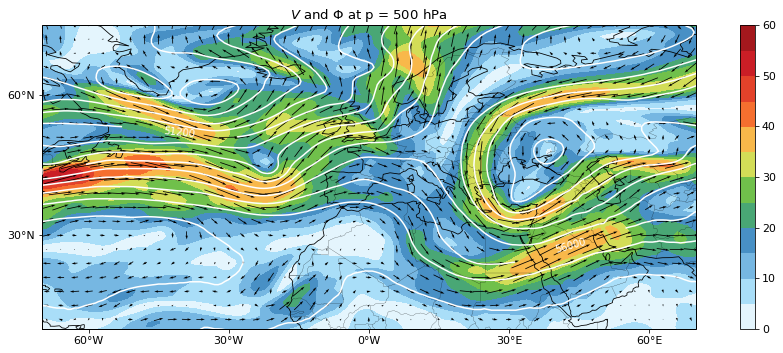

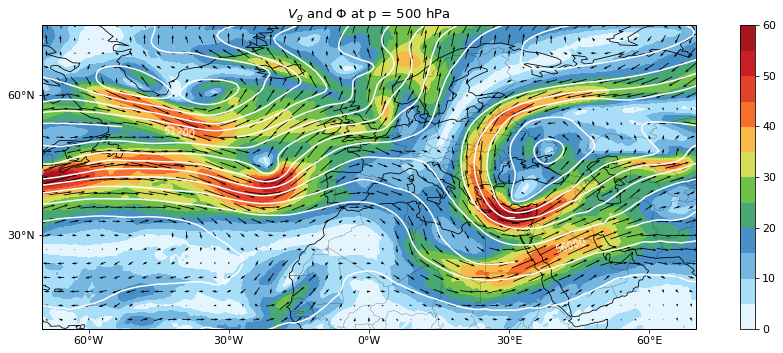

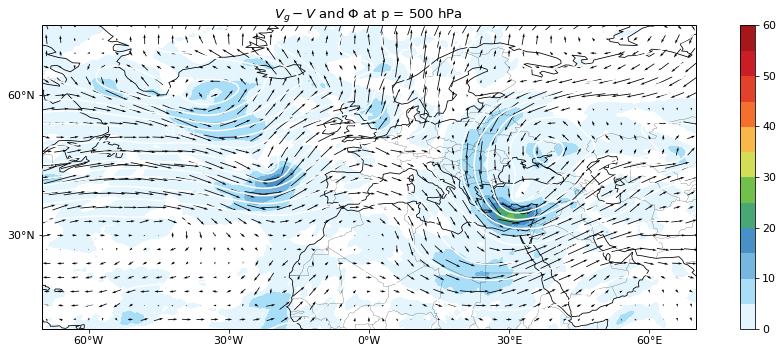

In [8]:
# Figures
fig1 = plt.figure()
ax1 = plt.subplot(111, projection=my_projection)

ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

V_range = np.arange(0, 61, 5)

cb = ax1.contourf(lon, lat, V[n,:,:], V_range, cmap=my_cmap) # We plot a colormesh using the gist_ncar colormap.
fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
lons, lats = np.meshgrid(lon, lat)
qu = ax1.quiver(lons[::nq, ::nq], lats[::nq, ::nq], u[n,::nq,::nq], v[n,::nq,::nq],\
                pivot='mid', width=1.2e-3, scale=1000.)
cz = ax1.contour(lon, lat, Phi[n,:,:], 15, colors='w', linewidths=1.5) # We plot the geopotential in contours.
ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
ax1.set_title(r'$V$ and $\Phi$ at p = {0:.0f} hPa'.format(p[n]/100.)); # We add a title to the plot.
ax1.set_xlim(lon_start, lon_end)
ax1.set_ylim(lat_start, lat_end)
fig1.tight_layout() # With this function we make the figure fit as good as possible.

fig1 = plt.figure()
ax1 = plt.subplot(111, projection=my_projection)

ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

cb = ax1.contourf(lon, lat, Vg[n,:,:], V_range, cmap=my_cmap) # We plot a colormesh using the gist_ncar colormap.
fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
lons, lats = np.meshgrid(lon, lat)
qu = ax1.quiver(lons[::nq, ::nq], lats[::nq, ::nq], u[n,::nq,::nq], v[n,::nq,::nq],\
                pivot='mid', width=1.2e-3, scale=1000.)
cz = ax1.contour(lon, lat, Phi[n,:,:], 15, colors='w', linewidths=1.5) # We plot the geopotential in contours.
ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
ax1.set_title(r'$V_g$ and $\Phi$ at p = {0:.0f} hPa'.format(p[n]/100.)); # We add a title to the plot.
ax1.set_xlim(lon_start, lon_end)
ax1.set_ylim(lat_start, lat_end)
fig1.tight_layout() # With this function we make the figure fit as good as possible.

fig1 = plt.figure()
ax1 = plt.subplot(111, projection=my_projection)

ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

cb = ax1.contourf(lon, lat, Vg[n,:,:]-V[n,:,:], V_range, cmap=my_cmap) # We plot a colormesh using the gist_ncar colormap.
fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
lons, lats = np.meshgrid(lon, lat)
qu = ax1.quiver(lons[::nq, ::nq], lats[::nq, ::nq], u[n,::nq,::nq], v[n,::nq,::nq],\
                pivot='mid', width=1.2e-3, scale=1000.)
cz = ax1.contour(lon, lat, Phi[n,:,:], 15, colors='w', linewidths=1.5) # We plot the geopotential in contours.
ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
ax1.set_title(r'$V_g - V$ and $\Phi$ at p = {0:.0f} hPa'.format(p[n]/100.)); # We add a title to the plot.
ax1.set_xlim(lon_start, lon_end)
ax1.set_ylim(lat_start, lat_end)
fig1.tight_layout()

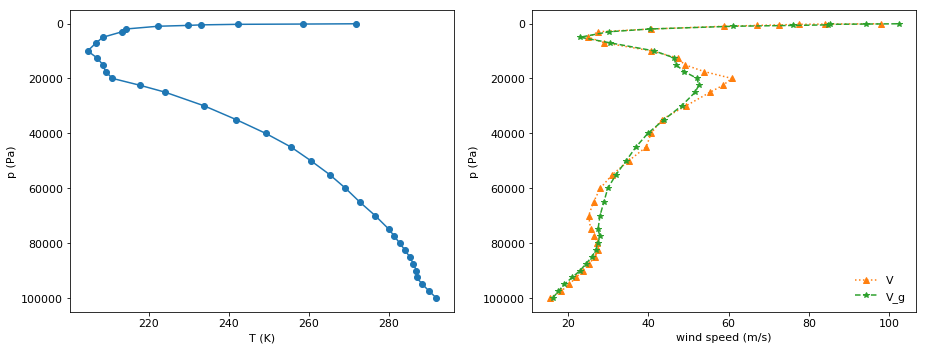

In [9]:
# Vertical profiles of wind and temperature.
lat_plot = 40.
lon_plot = -60.
i_lon = abs(lon - lon_plot).argmin()
j_lat = abs(lat - lat_plot).argmin()

fig = plt.figure()
ax1 = plt.subplot(121)
ax1.plot(T[:,j_lat,i_lon], p, 'C0o-')
ax1.set_xlabel('T (K)')
ax1.set_ylabel('p (Pa)')
ax1.invert_yaxis()

ax2 = plt.subplot(122)
ax2.plot(V [:,j_lat,i_lon], p, 'C1^:' , label='V')
ax2.plot(Vg[:,j_lat,i_lon], p, 'C2*--', label='V_g')
ax2.set_xlabel('wind speed (m/s)')
ax2.set_ylabel('p (Pa)')
ax2.legend(loc=0, frameon=False)
ax2.invert_yaxis()
fig.tight_layout()

In [26]:
latrad = np.deg2rad(lat)
lonrad = np.deg2rad(lon)

# We initialize an array with the cosine of the latitude.
cos_lat = np.cos(latrad)

# With \ it is possible to break a long line. Carefully study the use of the newaxis keyword.
dTdx = (a_earth*cos_lat[np.newaxis,:,np.newaxis])**(-1) \
     * np.gradient(T, axis=2) / np.gradient(lonrad[np.newaxis, np.newaxis, :], axis=2)
dTdy = (a_earth)**(-1) \
     * np.gradient(T, axis=1) / np.gradient(latrad[np.newaxis, :, np.newaxis], axis=1)

thermal_u = R/f[np.newaxis,:,np.newaxis]*dTdy

dugdlnp = np.gradient(ug, axis=0) / np.gradient(np.log(p[:, np.newaxis, np.newaxis]), axis=0)
dvgdlnp = np.gradient(vg, axis=0) / np.gradient(np.log(p[:, np.newaxis, np.newaxis]), axis=0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:1763: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (f[slice4] - f[slice2]) / (2. * dx[i])
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:1784: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (y[slice2] - y[slice3]) / dx_0
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:1791: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (y[slice2] - y[slice3]) / dx_n


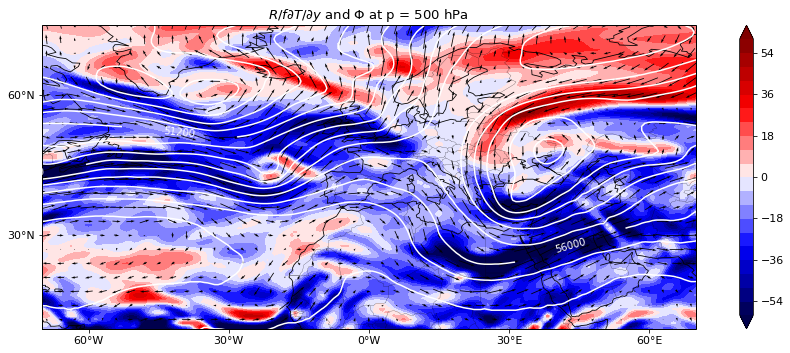

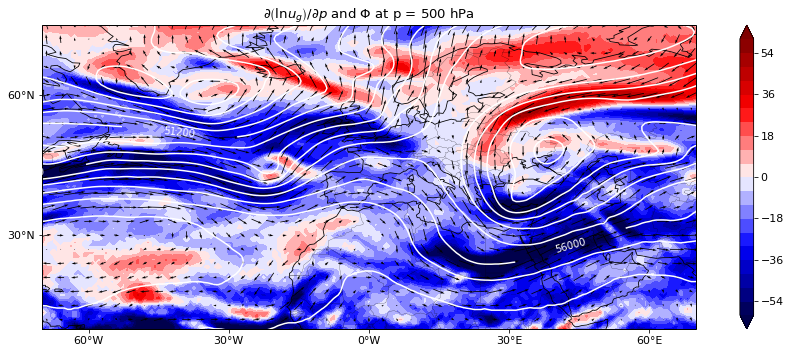

In [32]:
# Figures
fig1 = plt.figure()
ax1 = plt.subplot(111, projection=my_projection)

ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ut_range = np.linspace(-60., 60., 21)

cb = ax1.contourf(lon, lat, thermal_u[n,:,:], ut_range, cmap=plt.cm.seismic, extend='both') # We plot a colormesh using the gist_ncar colormap.
fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
lons, lats = np.meshgrid(lon, lat)
qu = ax1.quiver(lons[::nq, ::nq], lats[::nq, ::nq], u[n,::nq,::nq], v[n,::nq,::nq],\
                pivot='mid', width=1.2e-3, scale=1000.)
cz = ax1.contour(lon, lat, Phi[n,:,:], 15, colors='w', linewidths=1.5) # We plot the geopotential in contours.
ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
ax1.set_title(r'$R / f \partial T / \partial y$ and $\Phi$ at p = {0:.0f} hPa'.format(p[n]/100.)); # We add a title to the plot.
ax1.set_xlim(lon_start, lon_end)
ax1.set_ylim(lat_start, lat_end)
fig1.tight_layout() # With this function we make the figure fit as good as possible.

fig1 = plt.figure()
ax1 = plt.subplot(111, projection=my_projection)

ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ut_range = np.linspace(-60., 60., 21)

cb = ax1.contourf(lon, lat, dugdlnp[n,:,:], ut_range, cmap=plt.cm.seismic, extend='both') # We plot a colormesh using the gist_ncar colormap.
fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
lons, lats = np.meshgrid(lon, lat)
qu = ax1.quiver(lons[::nq, ::nq], lats[::nq, ::nq], u[n,::nq,::nq], v[n,::nq,::nq],\
                pivot='mid', width=1.2e-3, scale=1000.)
cz = ax1.contour(lon, lat, Phi[n,:,:], 15, colors='w', linewidths=1.5) # We plot the geopotential in contours.
ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
ax1.set_title(r'$\partial \left( \ln u_g \right) / \partial p$ and $\Phi$ at p = {0:.0f} hPa'.format(p[n]/100.)); # We add a title to the plot.
ax1.set_xlim(lon_start, lon_end)
ax1.set_ylim(lat_start, lat_end)
fig1.tight_layout() # With this function we make the figure fit as good as possible.



In [ ]:
pl.contourf(lat, p, T[:,:,lon_plot], 21)
pl.colorbar()

V_range = np.arange(-50, 100, 10)
cV = pl.contour(lat, p, u[:,:,lon_plot], V_range, colors='k', linewidths=1.)
pl.clabel(cV, fontsize=10., fmt='%1.0f')
pl.gca().invert_yaxis()
pl.xlabel('lat')
pl.ylabel('p (Pa)')
pl.ylim(100000, 1000)
pl.tight_layout()

In [ ]:
lat_plot = 40.
lon_plot = -60.
i_lon = abs(lon - lon_plot).argmin()
j_lat = abs(lat - lat_plot).argmin()

pl.subplot(121)
pl.plot(1000*dTdy[:,j_lat,i_lon], p, 'bo-')
pl.xlabel('dTdy (K/km)')
pl.ylabel('p (Pa)')
pl.gca().invert_yaxis()

pl.subplot(122)
pl.plot(dugdlnp[:,j_lat,i_lon], p, 'r^-' , label='dug/dlnp')
pl.xlabel('dug/dlnp')
pl.ylabel('p (Pa)')
pl.legend(loc=0, frameon=False)
pl.gca().invert_yaxis()
pl.tight_layout()

In [ ]:
pl.figure()
pl.contourf(lat, p, T[:,:,lon_plot], 21)
pl.colorbar()
pl.contour(lat, p, T[:,:,lon_plot], 21, colors='k')
pl.gca().invert_yaxis()
pl.xlabel('lat')
pl.ylabel('p (Pa)')
pl.ylim(100000, 1000)
pl.title('Pressure coordinates')
pl.tight_layout()

latp, pp = np.meshgrid(lat, p)

pl.figure()
pl.contourf(latp, z[:,:,lon_plot]/9.81, T[:,:,lon_plot], 21)
pl.colorbar()
pl.contour(latp, z[:,:,lon_plot]/9.81, T[:,:,lon_plot], 21, colors='k')
pl.clabel(cV, fontsize=10., fmt='%1.0f')
pl.xlabel('lat')
pl.ylabel('z (m)')
pl.ylim(0, 25000)
pl.title('Height coordinates')
pl.tight_layout()